## Feature Extraction

#### Dict Vectorizer
Get the feature from dict

In [5]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': 'Tokyo', 'temperature': 27.},
]

In [6]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

In [7]:
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0.,  0., 33.],
       [ 0.,  1.,  0.,  0., 12.],
       [ 0.,  0.,  1.,  0., 18.],
       [ 0.,  0.,  0.,  1., 27.]])

In [8]:
vec.get_feature_names_out()

array(['city=Dubai', 'city=London', 'city=San Francisco', 'city=Tokyo',
       'temperature'], dtype=object)

In [9]:
pos_window = [
    {
        'word-2': 'the',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    },
    # in a real application one would extract many such dictionaries
]

In [11]:
vec = DictVectorizer()
vectorized_dict = vec.fit_transform(pos_window)
vectorized_dict

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
vectorized_dict.toarray()

array([[1., 1., 1., 1., 1., 1.]])

## Text Feature Extraction

### 1. Bag of Words Representation

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
vectorizer

CountVectorizer()

In [15]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [16]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [17]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [18]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [19]:
vectorizer.transform(["is is is is the new"]).toarray()

array([[0, 0, 0, 4, 0, 0, 1, 0, 0]], dtype=int64)

In [23]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (
    ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']
)

True

In [24]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]],
      dtype=int64)

In [25]:
bigram_vectorizer.get_feature_names_out()

array(['and', 'and the', 'document', 'first', 'first document', 'is',
       'is the', 'is this', 'one', 'second', 'second document',
       'second second', 'the', 'the first', 'the second', 'the third',
       'third', 'third one', 'this', 'this is', 'this the'], dtype=object)

### 2. Tf-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False) # smooth_idf=False, the “1” count is added to the idf instead of the idf’s denominator

transformer


TfidfTransformer(smooth_idf=False)

In [27]:
X = transformer.fit_transform(X)
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [29]:
X.toarray() # (no. of documents * no. unique words)

array([[0.        , 0.43306685, 0.56943086, 0.43306685, 0.        ,
        0.        , 0.33631504, 0.        , 0.43306685],
       [0.        , 0.24014568, 0.        , 0.24014568, 0.        ,
        0.89006176, 0.18649454, 0.        , 0.24014568],
       [0.56115953, 0.        , 0.        , 0.        , 0.56115953,
        0.        , 0.23515939, 0.56115953, 0.        ],
       [0.        , 0.43306685, 0.56943086, 0.43306685, 0.        ,
        0.        , 0.33631504, 0.        , 0.43306685]])

### Image Feature Extraction

In [37]:
import numpy as np
from sklearn.feature_extraction import image

one_image = np.random.randn(6 * 4 * 3).reshape((6, 4, 3)) # height, width, channels
one_image

array([[[-0.45846007,  1.07146594,  2.29058404],
        [-1.68497878,  0.68431487, -0.37821551],
        [-0.27912912, -2.48158581, -0.70947481],
        [-1.12345921, -0.82666656, -0.41075494]],

       [[ 1.36566861, -0.11758221, -1.4877582 ],
        [-0.25255357,  0.11051328, -1.07348638],
        [-0.13590097, -1.66368927,  0.80684097],
        [ 0.83352376,  0.71969083, -1.66829964]],

       [[ 1.68622673,  0.19064692, -0.07440409],
        [ 0.6924426 , -1.29671116,  0.59103605],
        [ 1.252203  , -1.65044345,  0.18108027],
        [-0.40574465, -0.85323515,  1.64400208]],

       [[-0.02987544,  0.43135965, -1.94704221],
        [-0.77094757, -1.2702627 ,  1.71949266],
        [ 0.55209293, -0.99286784,  1.9705828 ],
        [-1.16845779, -0.32995751,  2.10807197]],

       [[ 1.05278711,  0.58518487, -0.38306715],
        [ 1.52410805,  0.82906197,  1.43655356],
        [-0.89542401, -0.15110029,  1.03543341],
        [-1.16644862,  0.84255503,  1.61595577]],

       [[-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


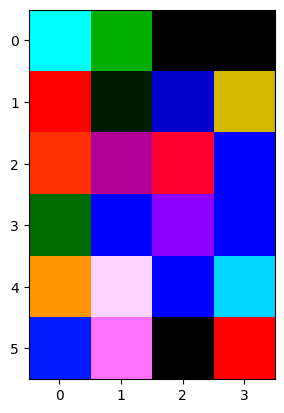

In [39]:
import matplotlib.pyplot as plt

plt.imshow(one_image, interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


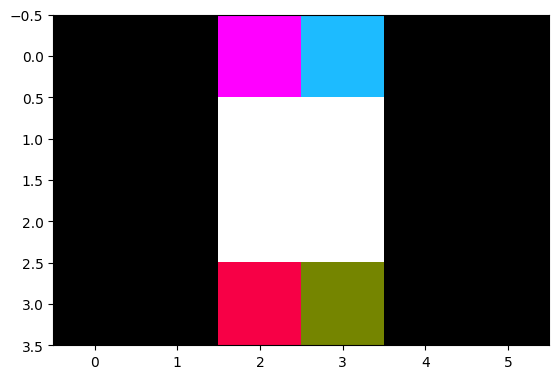

In [111]:
image_2 = np.random.randn(3 * 6 * 4).reshape((4, 6, 3)) # height, width, channel
image_2[:, 0:2 ,:] = 0 # width 0 and 1 are black
image_2[1:3, 2:4, :] = 255 # height 1 and 2 are white
image_2[:, 4:6, :] = 0
plt.imshow(image_2, interpolation='nearest')

In [114]:
image_3 = np.zeros((2, 3, 3), dtype=int)
image_3

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

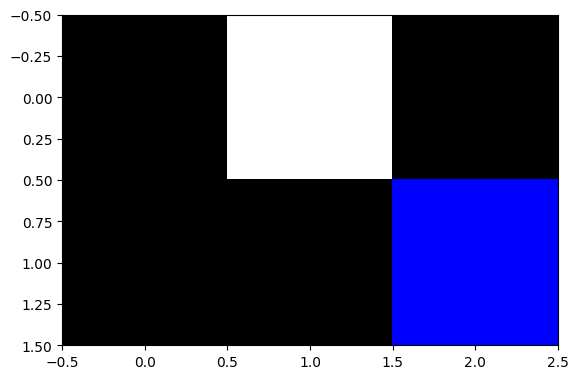

In [116]:
image_3[0, 1, :] = 255 # first height row, second width all channel
image_3[1, -1, 2] = 255 # make the last pixel blue
plt.imshow(image_3, interpolation='nearest')

Shape: (2, 3), (2, 3), (2, 3)


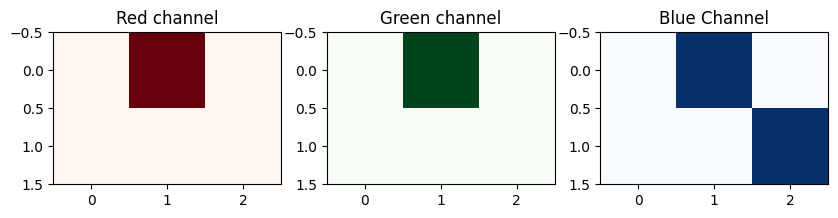

In [123]:
R, G, B = image_3[:, :, 0], image_3[:, :, 1], image_3[:, :, 2]

# show all in subplots
plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.title("Red channel")
plt.imshow(R, cmap=plt.cm.Reds)
plt.subplot(132)
plt.title("Green channel")
plt.imshow(G, cmap=plt.cm.Greens)
plt.subplot(133)
plt.title("Blue Channel")
plt.imshow(B, cmap=plt.cm.Blues)

print(f"Shape: {R.shape}, {G.shape}, {B.shape}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


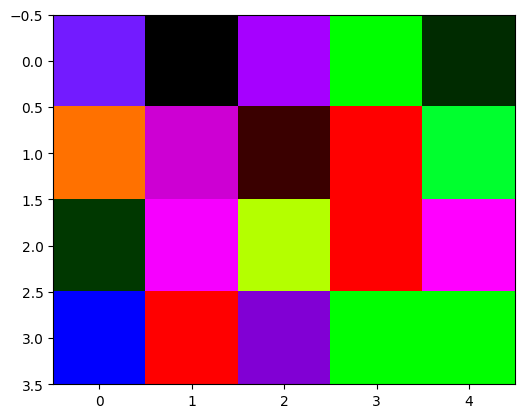

In [132]:
image_ = np.random.randn(4, 5, 3)
plt.imshow(image_, interpolation='nearest')

In [139]:
from sklearn.feature_extraction import image

patches = image.extract_patches_2d(image_, (2, 2), max_patches=4)
patches, patches.shape

(array([[[[ 1.89433064, -0.91256597, -1.44602033],
          [ 1.03137223, -0.68427379,  1.05691294]],
 
         [[-0.74561235,  1.81567938, -1.44152388],
          [-0.2058728 ,  1.415595  , -1.63400973]]],
 
 
        [[[-0.74939988, -0.26541052, -1.13612425],
          [ 0.65466897, -0.77245255,  2.14461249]],
 
         [[ 0.80521424, -0.08201001,  0.83021212],
          [ 0.22789808, -0.27609105, -1.33709345]]],
 
 
        [[[ 0.45488037,  0.10868524,  1.40683043],
          [-0.74939988, -0.26541052, -1.13612425]],
 
         [[ 1.89350372,  0.4460177 , -1.11876859],
          [ 0.80521424, -0.08201001,  0.83021212]]],
 
 
        [[[-0.74939988, -0.26541052, -1.13612425],
          [ 0.65466897, -0.77245255,  2.14461249]],
 
         [[ 0.80521424, -0.08201001,  0.83021212],
          [ 0.22789808, -0.27609105, -1.33709345]]]]),
 (4, 2, 2, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


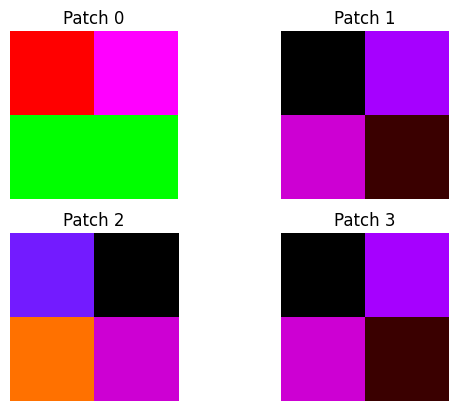

In [146]:
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Patch {i}")
    plt.imshow(patches[i], interpolation='nearest')
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


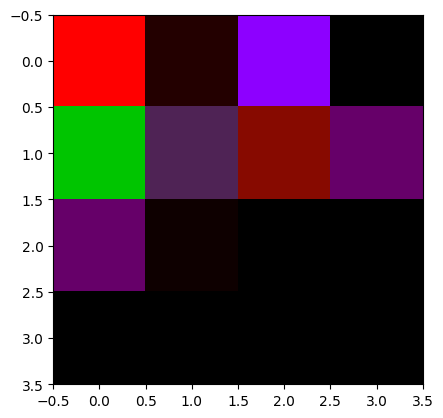

In [148]:
reconstructed = image.reconstruct_from_patches_2d(patches, (4, 4, 3))
plt.imshow(reconstructed, interpolation='nearest')